**Назирзода Рахимджон**

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [101]:
df = pd.read_csv('mpg.csv')
df1 = pd.read_csv('dm_office_sales.csv')

**Пункт 1**

In [29]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    int64  
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   name          398 non-null    object 
dtypes: float64(3), int64(5), object(1)
memory usage: 28.1+ KB


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [7]:
df['horsepower'] = df['horsepower'].apply(lambda x : 0 if not x.isdigit() else int(x))

In [8]:
df['horsepower']

0      130
1      165
2      150
3      150
4      140
      ... 
393     86
394     52
395     84
396     79
397     82
Name: horsepower, Length: 398, dtype: int64

In [33]:
non_numeric = df[["horsepower", "mpg", "displacement", "weight", "acceleration"]].apply(
    lambda col: col.apply(lambda x: isinstance(x, str)).sum()
)

non_numeric

horsepower      0
mpg             0
displacement    0
weight          0
acceleration    0
dtype: int64

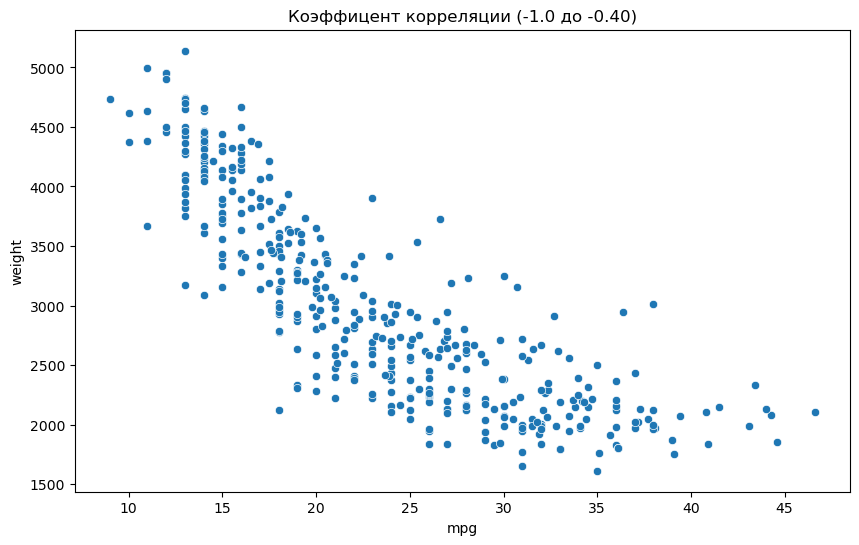

In [41]:
plt.figure(figsize=(10, 6))

sns.scatterplot(data=df, 
                x='mpg', 
                y='weight')
plt.title('Коэффицент корреляции (-1.0 до -0.40)')

plt.show()

Отрицательная корреляция так как хвостовая часть идет направо. Данная диаграмма говорит, что чем больше вес автомобилья тем больше расход топливо на меньше расстояние. Н-р если вес машины от 4500-5000 кг то с одним галлоном топливо она поедет 10-15 миль и когда вес машины между 1800-2200кг то с одним голлоном топливо она поедет 40-45 миль.

Столбец_1 (м/г) и Столбец_2 (масса) - Коэффицент корреляции -0,832. Как сказанно выше чем больше масса автомобилья тем меньше вероятность экономии топливо.

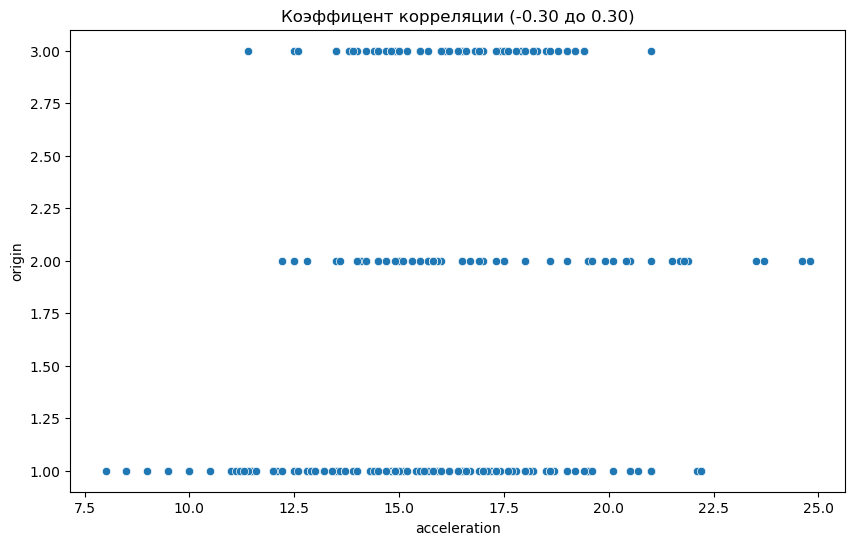

In [43]:
plt.figure(figsize=(10, 6))

sns.scatterplot(data=df, 
                x='acceleration', 
                y='origin')
plt.title('Коэффицент корреляции (-0.30 до 0.30)')

plt.show()

Как всем известно 1-кодировка американских машин, 2-европейских и 3-азиатские. Т.е. Данная диаграмма распределяла машин согласно характеристику по ускорению и страна производство. Индекс разгона зависит от технической характеристики машин т.е кузов, двигатель и т.д.

Столбец_1 (разгон/ускорение) и Столбец_2 (страна производство) - Коэффицент корреляции 0,2127. Мое мнение что в среднем американские машины быстро разгоняются.  

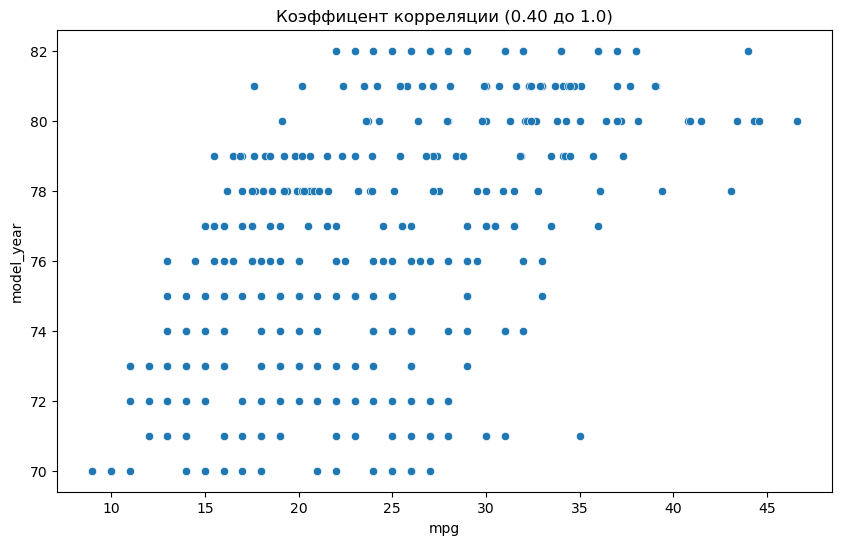

In [45]:
plt.figure(figsize=(10, 6))

sns.scatterplot(data=df, 
                x='mpg', 
                y='model_year')
plt.title('Коэффицент корреляции (0.40 до 1.0)')

plt.show()

Данная диаграмма показывает, что год за годом новые модели машины стали более экономичными. Т.е. выпуски 80-х более экономичные чем 70-х. Надо подчеркнуть, что все зависит от технической характеристики и улучшение машины. 

Столбец_1 (м/г) и Столбец_2 (год выпуска) - Коэффицент корреляции 0,5805. Мое мнение что год за годом машины стали новыми и экономичными и все прежные недостатки и обратные связи от пользователей были исправлены и учтнены.

**Пункт-2**

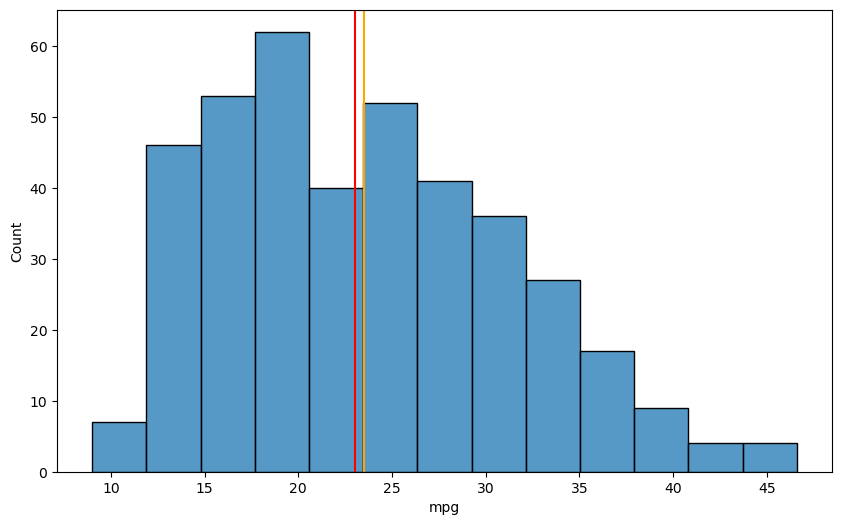

In [72]:
plt.figure(figsize=(10, 6))

md = df['mpg'].median()
mn = df['mpg'].mean()

sns.histplot(data=df, x='mpg')

plt.axvline(md, color='red')
plt.axvline(mn, color='orange')

plt.show()

In [86]:
df['mpg'].median()

23.0

In [88]:
df['mpg'].mean()

23.514572864321607

Распределение данных согласно расхода топливо машины на один миль. Медиана и среднее арифметическое значение имеют разницу на 0.51 друг от друга. Данные распределеные симметрично согласно медианы хотя визуально права часть диаграммы иммет больше коллоннок. 

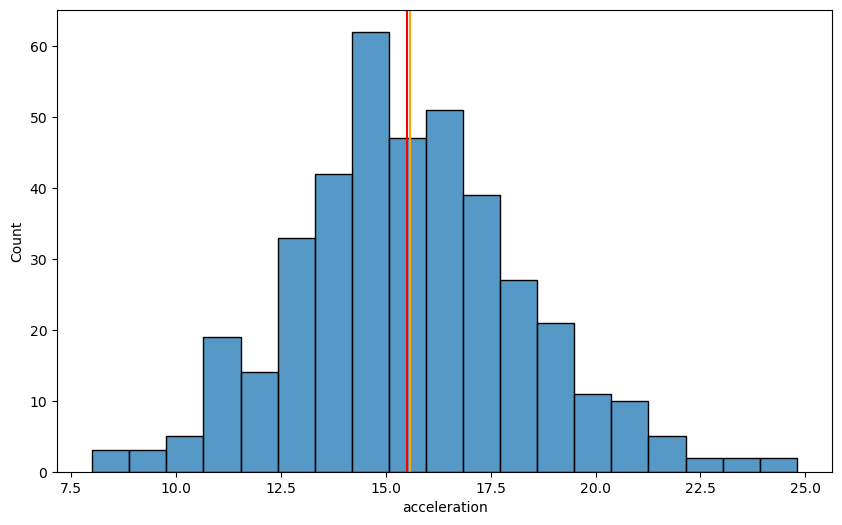

In [74]:
plt.figure(figsize=(10, 6))

md = df['acceleration'].median()
mn = df['acceleration'].mean()

sns.histplot(data=df, x='acceleration')

plt.axvline(md, color='red')
plt.axvline(mn, color='orange')

plt.show()

In [90]:
df['acceleration'].median()

15.5

In [92]:
df['acceleration'].mean()

15.568090452261307

Распределение данных согласно ускорение машины до 100м/сек или же 100км/сек. Медиана и среднее арифметическое значение практически находятся на одном месте с разницей всего лишь на 0.06. Согласно диаграмме более 60 машин разгоняются до 100км/миль в 15 сек. Скорее всего эти европейские машины. 

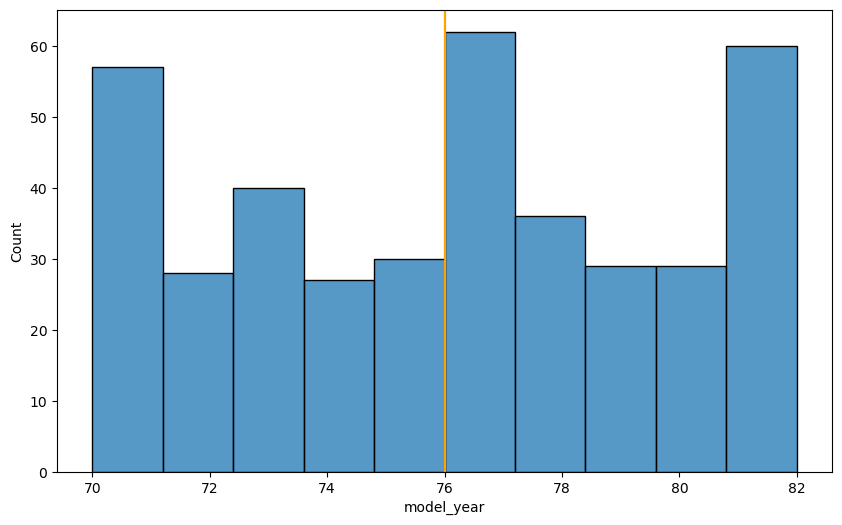

In [76]:
plt.figure(figsize=(10, 6))

md = df['model_year'].median()
mn = df['model_year'].mean()

sns.histplot(data=df, x='model_year')

plt.axvline(md, color='red')
plt.axvline(mn, color='orange')

plt.show()

In [94]:
df['model_year'].median()

76.0

In [96]:
df['model_year'].mean()

76.01005025125629

Распределение данных согласно года выпуска машины. Медиана и среднее арифметическое значение практически находятся на одном месте с разницей всего лишь на 0.01. Согласно диаграмме в 1970, 1976 и 1982 были произведены самое большое количество машин. 

**Пункт 3**

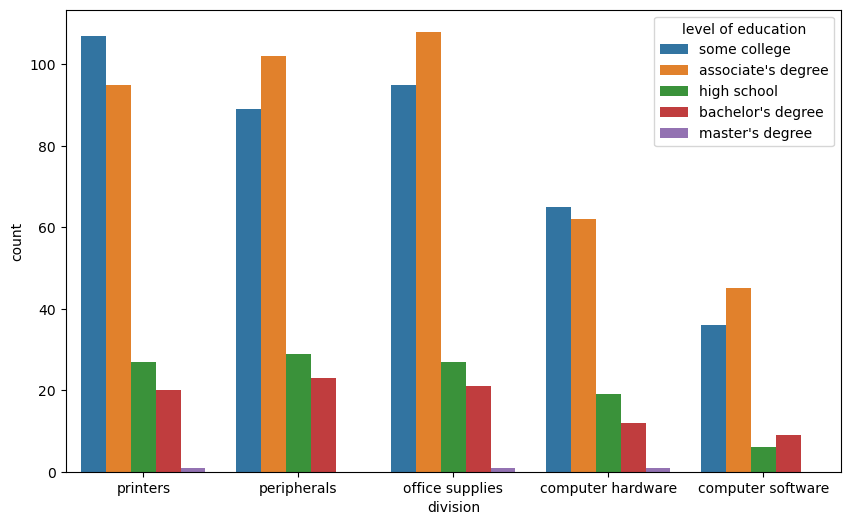

In [105]:
plt.figure(figsize=(10, 6))
sns.countplot(df1, x='division', hue='level of education')

plt.show()

Согласно диаграмме мне кажется что данная компания является как типографической или сервис провайдером по рекламных и подобных услуг. Так как в основном сотрудники имеют уровень образования колледжа или же чуть выше а меньшее количество сотрудников имеют степень бакалавра. А степень магистра практический нету. Для подобных род работ например печать, набор текстов и тд не будут нужны специалисты с вышем образованием. В отделах печать (набор/печать) материалов, уход за печатных акссесуаров и отдел доставки концелярских товаров большенство имеют образования уровени колледжа и там очень много сотрудников. А в двух оставльных отделах мало сотрудников хотя соотношение уровни образования почти также как в трех предыдущих отделах.  

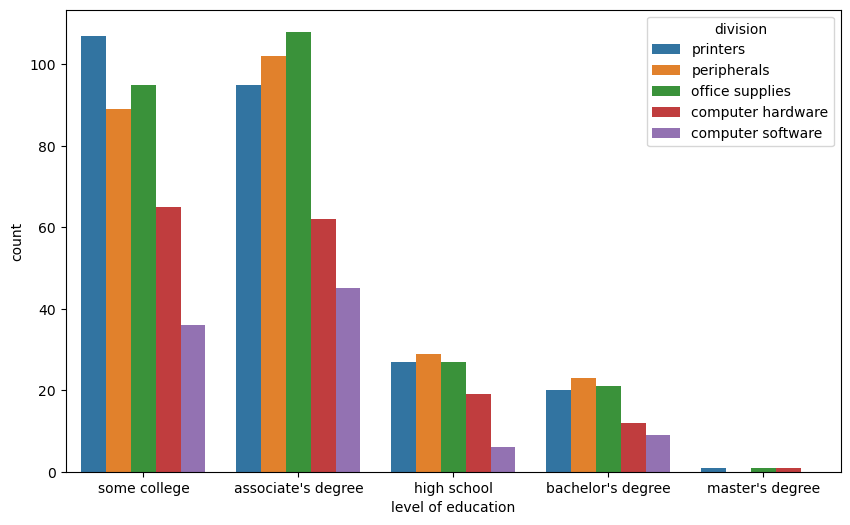

In [107]:
plt.figure(figsize=(10, 6))
sns.countplot(df1, x='level of education', hue='division')

plt.show()

Как было отмеченно выше данной компании не нужны специалисты с вышем образованиям так как эта типа как принтинг компани или не типография. Поэтому в данной компании работают люди, которые имеют уровен колледжа и это зависит от отдела. В некоторых отделах есть сотрудники с уровнем образования мастера с фокусом на компьютерной программирования и технологии. А столбцы имеющих примерно одинаковой высоты это сотрудники с одинаковыми уровнями образования работающих в разных отделах.